In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Using TensorFlow backend.


In [4]:
#Fetch 1 car image for display
car1 = cv2.imread('../input/data-testing/data/data/training/00-damage/0005.JPEG')

In [5]:
#Keras image generator will be used to create additional training images

image_gen = ImageDataGenerator(rotation_range=40, # rotate the image 30 degrees
                               width_shift_range=0.05, # Shift the pic width by a max of 10%
                               height_shift_range=0.05, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               #shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.05, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest'# Fill in missing pixels with the nearest filled value
                              # featurewise_center=True
                              )

In [6]:

image_gen_validate = ImageDataGenerator(
                               rescale=1/255 # Rescale the image by normalzing it.       
                               #featurewise_center=True
                              )

In [7]:
#image_gen.mean=np.array([103.939, 116.779, 123.68],dtype=np.float32).reshape(1,1,3)

In [8]:
#image_gen_validate.mean=np.array([103.939, 116.779, 123.68],dtype=np.float32).reshape(1,1,3)

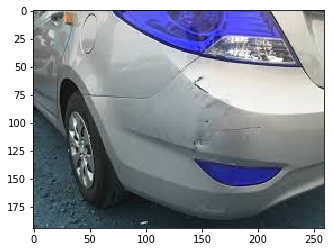

In [9]:
#Show an image of one of the damaged cars
plt.imshow(car1)

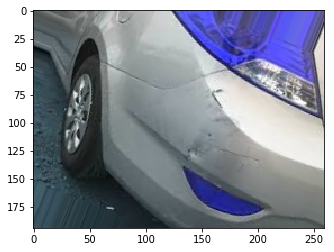

In [10]:
#Example Transformation of car image.
plt.imshow(image_gen.random_transform(car1))

In [11]:
image_gen.flow_from_directory('../input/data-testing/data/data/training')

Found 1840 images belonging to 2 classes.


In [12]:
image_gen.flow_from_directory('../input/data-testing/data/data/validation')

Found 460 images belonging to 2 classes.


In [13]:
#Resizing images to 224x224.  I'm thinking of using VGG-16 for transfer learning so trying out this.  Average image size is 312 x 447
# width,height,channels
image_shape = (299,299,3)
#batch_size = 10
batch_size = 5

In [14]:
from keras import optimizers
from keras import backend as K

In [15]:
import numpy as np 
from keras.models import Model 
from keras.applications import Xception 
from keras.layers import Dense, GlobalAveragePooling2D 
#from keras.optimizers import Adam
from keras.applications import imagenet_utils 
from keras.utils import np_utils 
from keras.callbacks import EarlyStopping 

In [16]:
xception_model = Xception(weights='imagenet', include_top=False) 

83689472/83683744 [==============================] - 1s 0us/step


In [17]:
from keras.layers import BatchNormalization

x = xception_model.output 
x = GlobalAveragePooling2D()(x) 
x = Dense(768, activation='relu')(x) 
x = BatchNormalization()(x)
out = Dense(1, activation='sigmoid')(x)

In [18]:
model = Model(inputs=xception_model.input, outputs=out)

In [19]:
for layer in xception_model.layers:
   layer.trainable = False

In [20]:
for i, layer in enumerate(model.layers):
  print(i, layer.name) 

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_1
13 block2_pool
14 batch_normalization_1
15 add_1
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_2
23 block3_pool
24 batch_normalization_2
25 add_2
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_3
33 block4_pool
34 batch_normalization_3
35 add_3
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_4
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepcon

In [21]:
for layer in model.layers[:105]:
  layer.trainable = False
for layer in model.layers[105:]:
  layer.trainable = True  

In [22]:
len(model.layers)

136

In [23]:
print("Trainable layers:", model.trainable_weights)

Trainable layers: [<tf.Variable 'block12_sepconv1/depthwise_kernel:0' shape=(3, 3, 728, 1) dtype=float32_ref>, <tf.Variable 'block12_sepconv1/pointwise_kernel:0' shape=(1, 1, 728, 728) dtype=float32_ref>, <tf.Variable 'block12_sepconv1_bn/gamma:0' shape=(728,) dtype=float32_ref>, <tf.Variable 'block12_sepconv1_bn/beta:0' shape=(728,) dtype=float32_ref>, <tf.Variable 'block12_sepconv2/depthwise_kernel:0' shape=(3, 3, 728, 1) dtype=float32_ref>, <tf.Variable 'block12_sepconv2/pointwise_kernel:0' shape=(1, 1, 728, 728) dtype=float32_ref>, <tf.Variable 'block12_sepconv2_bn/gamma:0' shape=(728,) dtype=float32_ref>, <tf.Variable 'block12_sepconv2_bn/beta:0' shape=(728,) dtype=float32_ref>, <tf.Variable 'block12_sepconv3/depthwise_kernel:0' shape=(3, 3, 728, 1) dtype=float32_ref>, <tf.Variable 'block12_sepconv3/pointwise_kernel:0' shape=(1, 1, 728, 728) dtype=float32_ref>, <tf.Variable 'block12_sepconv3_bn/gamma:0' shape=(728,) dtype=float32_ref>, <tf.Variable 'block12_sepconv3_bn/beta:0' sha

# Create the CNN

In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

model.compile(loss='binary_crossentropy',
              #optimizer=optimizers.RMSprop(lr=0.0001),
              #optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
              #optimizer='Adagrad',
              optimizer=optimizers.adam(lr=0.00005),
              #optimizer=optimizers.nadam(lr=0.0001),
              metrics=['accuracy'])

model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [25]:
validation_size = image_gen.flow_from_directory('../input/data-testing/data/data/validation').n
training_size = image_gen.flow_from_directory('../input/data-testing/data/data/training').n


Found 460 images belonging to 2 classes.
Found 1840 images belonging to 2 classes.


In [26]:
#Train the model!
train_image_gen = image_gen.flow_from_directory('../input/data-testing/data/data/training',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

train_image_gen.class_indices

test_image_gen = image_gen_validate.flow_from_directory('../input/data-testing/data/data/validation',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

train_image_gen.class_indices

epochs = 150

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='acc', mode='min', verbose=1, patience=6)

#adding a LR reduction callback.  This will reduce the learning rate if the validation loss is not improving after 5 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.00008)
from keras.callbacks import ModelCheckpoint
mc =  ModelCheckpoint('best_model_transfer_x.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='acc', mode='max', verbose=1, patience=5)

#Run the model!
results = model.fit_generator(train_image_gen,epochs=epochs,
                              steps_per_epoch=training_size/batch_size,
                              validation_data=test_image_gen,
                             validation_steps=validation_size/batch_size,
                             callbacks=[mc])

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Epoch 1/150
368/368 [==============================] - 65s 177ms/step - loss: 0.4081 - acc: 0.8283 - val_loss: 0.2419 - val_acc: 0.9043

Epoch 00001: val_loss improved from inf to 0.24187, saving model to best_model_transfer_x.h5
Epoch 2/150
368/368 [==============================] - 53s 145ms/step - loss: 0.3470 - acc: 0.8560 - val_loss: 0.2221 - val_acc: 0.9130

Epoch 00002: val_loss improved from 0.24187 to 0.22210, saving model to best_model_transfer_x.h5
Epoch 3/150
368/368 [==============================] - 54s 148ms/step - loss: 0.3251 - acc: 0.8620 - val_loss: 0.2576 - val_acc: 0.8957

Epoch 00003: val_loss did not improve from 0.22210
Epoch 4/150
368/368 [==============================] - 54s 146ms/step - loss: 0.2796 - acc: 0.8837 - val_loss: 0.1996 - val_acc: 0.9261

Epoch 00004: val_loss improved from 0.22210 to 0.19956, saving model to best_model_transfer_x.h5
Epoch 5/150
368/368 [==========

<a href="best_model_transfer_x.h5"> Download File </a>

In [27]:
import os
dir = './'
content = os.listdir(dir)
print(content)

['best_model_transfer_x.h5', '__output__.json', '__notebook__.ipynb']


In [28]:
import pandas as pd
my_final_results = pd.DataFrame(results.history['acc'])

In [29]:
my_final_results.to_csv('results.csv')

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


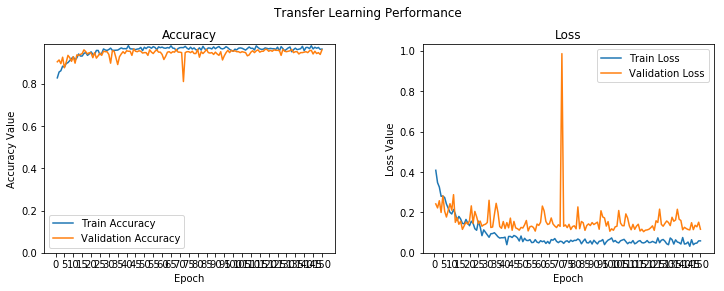

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, results.history['acc'], label='Train Accuracy')
ax1.set_ylim(ymin=0)
ax1.plot(epoch_list, results.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, results.history['loss'], label='Train Loss')
ax2.plot(epoch_list, results.history['val_loss'], label='Validation Loss')
ax2.set_ylim(ymin=0)
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [31]:
# save model
model.save('final_model_x.h5')


In [32]:
# load the saved model
from keras.models import load_model

model = load_model('best_model_transfer_x.h5')